# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
from scipy.special import expit as sigmoid
import random
import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка
  

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров. 

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать. 

In [3]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id', 
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [4]:
data = data.dropna()
data.isna().sum()

pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

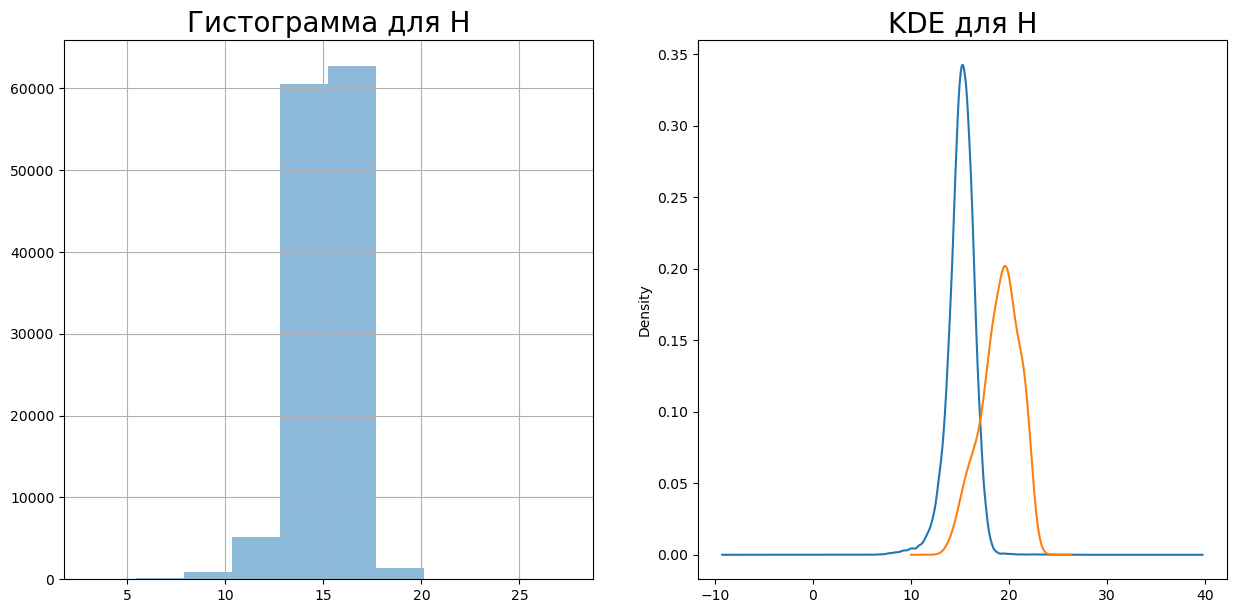

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['H'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20);

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** KDE, на гистограмме вообще второй класс не видно из-за масштаба, задаваемого первой гистограммой, потому что 0-объектов много больше, чем 1-объектов.

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

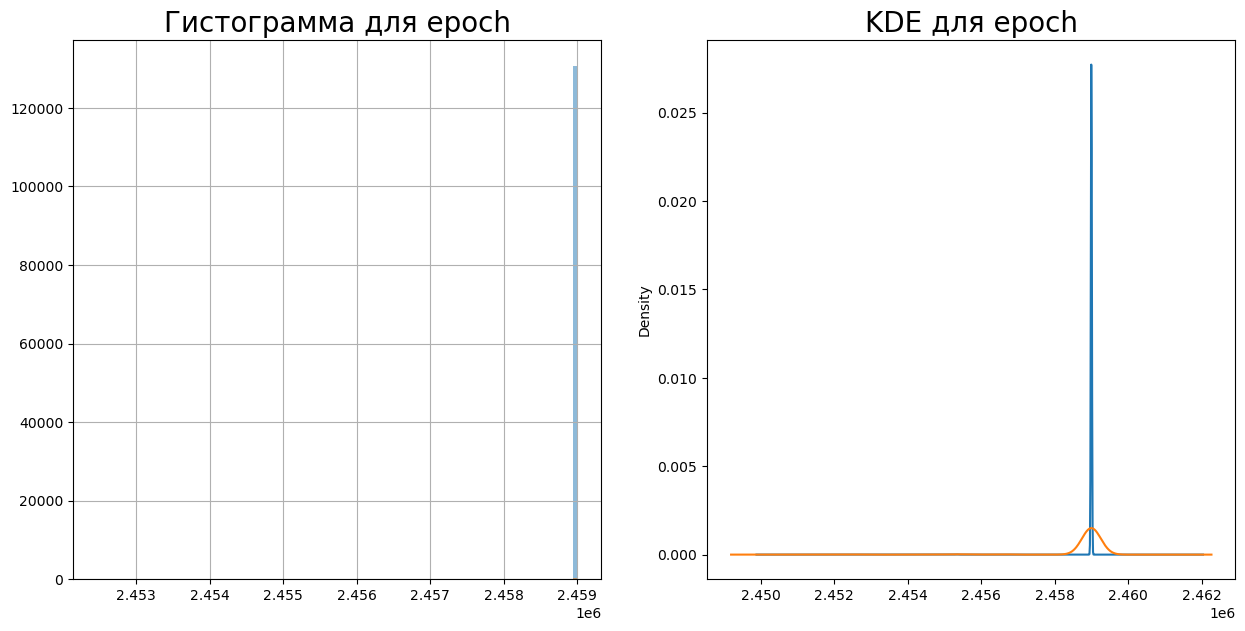

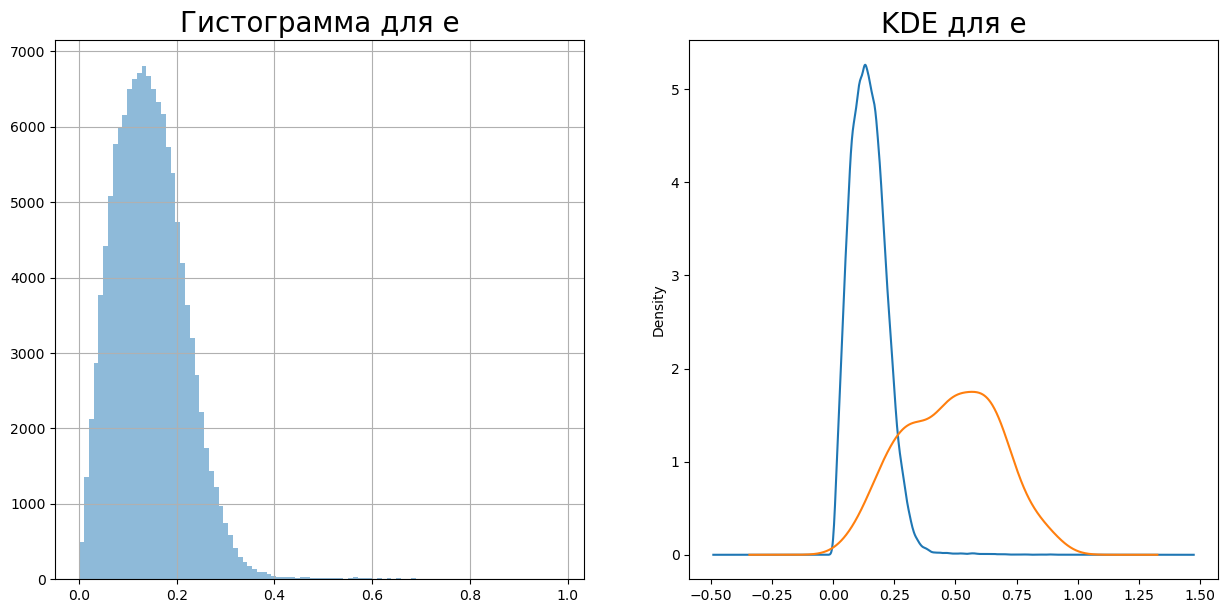

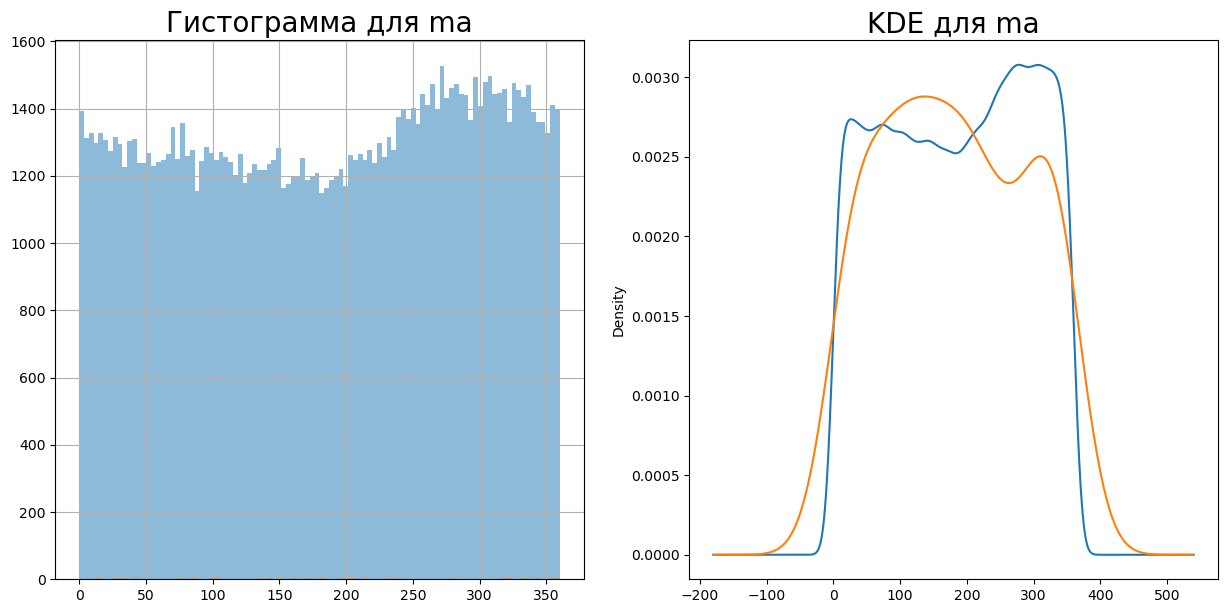

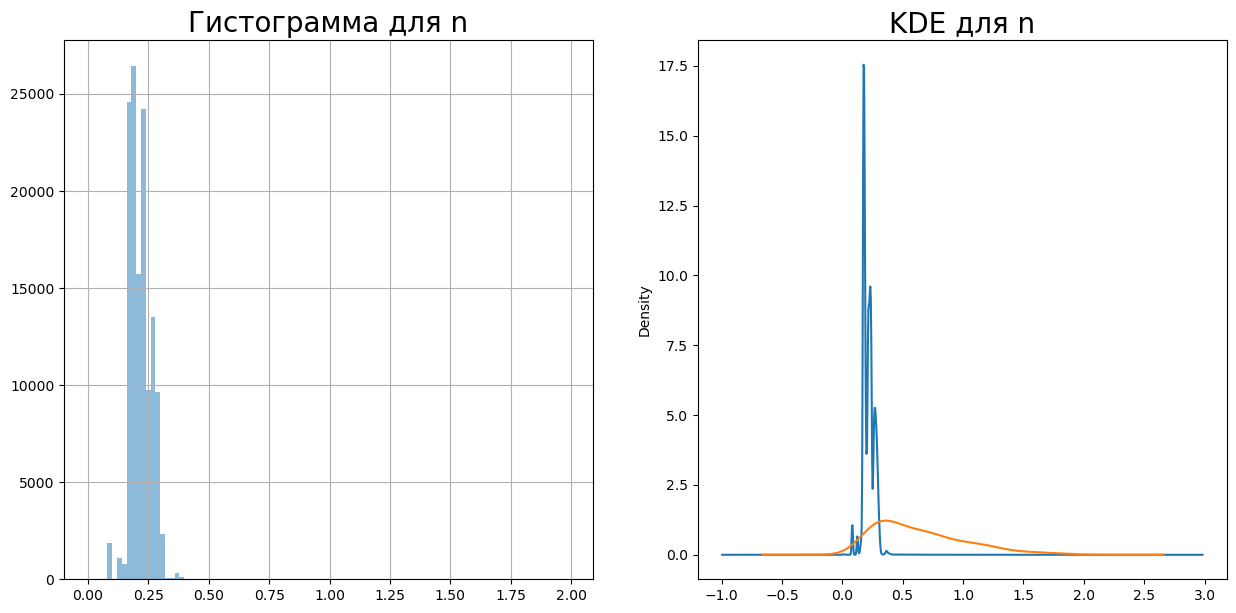

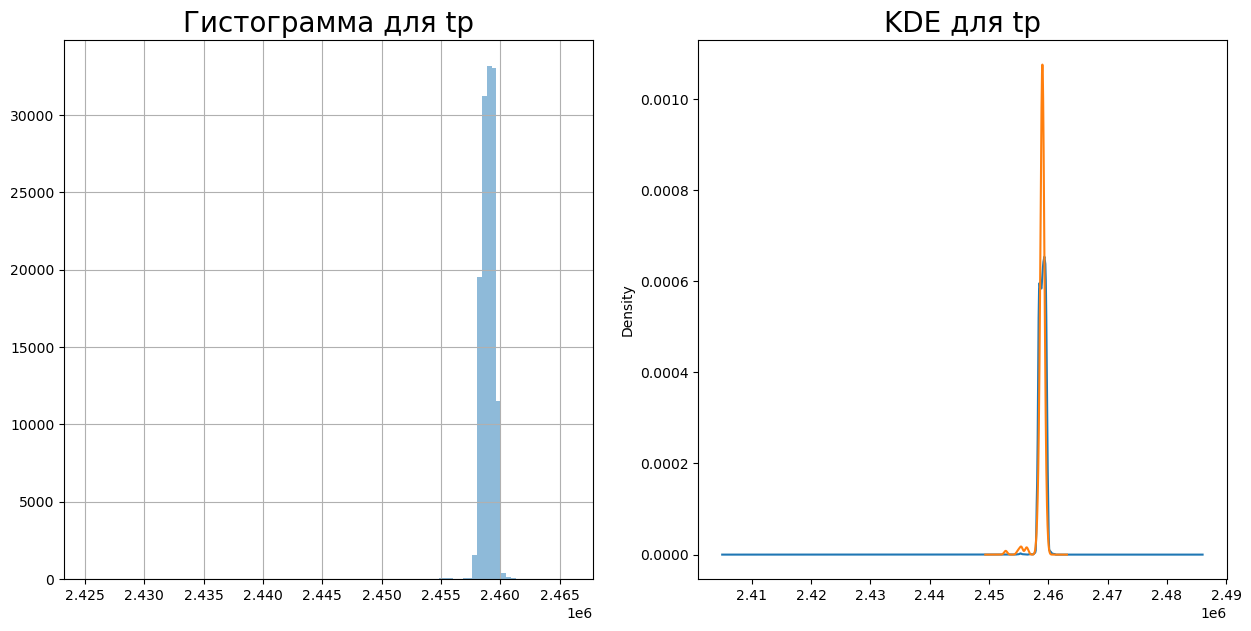

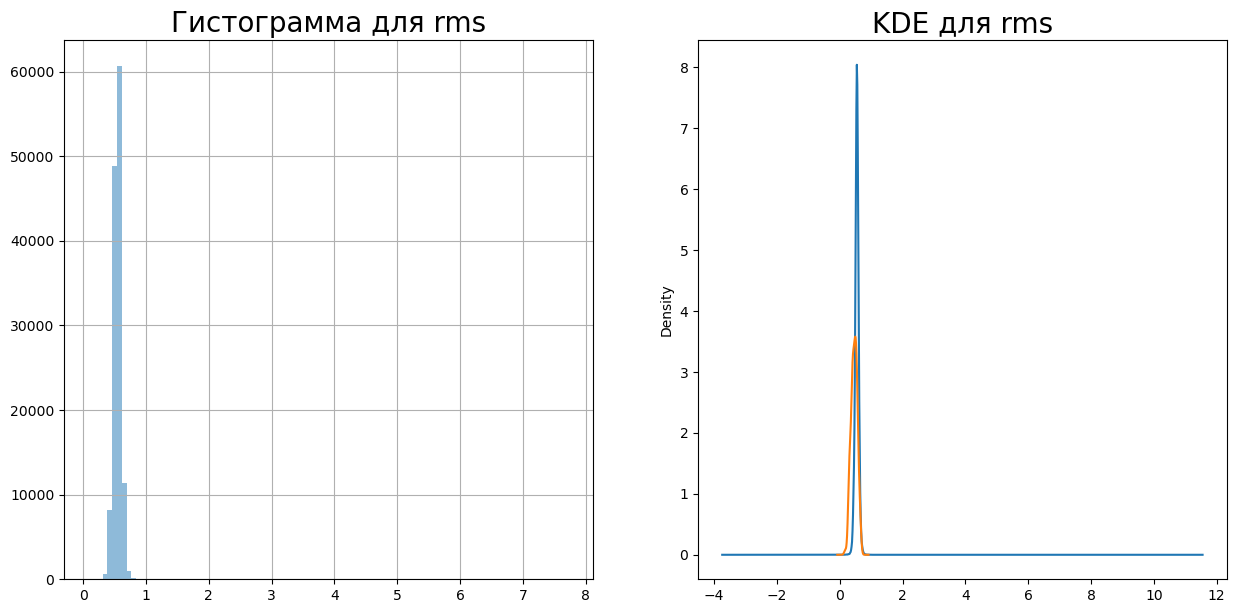

In [7]:
features = ['epoch', 'e', 'ma', 'n', 'tp', 'rms']

for feature in features:
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    data.groupby("pha")[feature].hist(ax=axs[0],alpha=0.5, bins =100 )
    data.groupby("pha")[feature].plot(kind='kde', ax=axs[1])
    axs[0].set_title('Гистограмма для ' + feature, fontsize=20)
    axs[1].set_title('KDE для ' + feature, fontsize=20);

Какие выводы вы можете сделать из полученный графиков?

**Вывод:** классы можно различить по e и n, по остальным сложно провести четкое разделение

KDE в данном случае является способом представления данных лучше, чем с помощью гистограмм

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [8]:
X = data[features]
y = data["pha"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=222)

Отмасштабируйте свои признаки.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Обучите модель логистической регрессии.

In [10]:
clf = LogisticRegression(random_state=1223)
clf.fit(X_train, y_train)

LogisticRegression(random_state=1223)

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [33]:
predicted = clf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 = {f1:.3f}')

Accuracy: 0.999
Precision: 0.353
Recall: 0.125
F1 = 0.185


In [13]:
print(y.shape, y.sum())

(131142,) 181


**Вывод:** Видно что объектов, принадлежащих классу 1 много меньше 0-объектов, поэтому accuracy_score применять плохо, что даёт ложное представление о точности модели



### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

- без регуляризации:

$\theta_{t+1} = \theta_t + \eta\sum\limits_{i=1}^n[Y_i-\sigma(\theta^T_tx_i)]x_i$

$\theta_{t+1} = \theta_t + \eta\sum\limits_{j=1}^m[Y_{i_j}-\sigma(\theta^T_tx_{i_j})]x_{i_j}$,  где $i_1, \dots, i_m \sim U\{1, \dots, n\}$ - батч

- ridge-регуляризация:

$\frac{\partial}{\partial \theta}[\ell_Y(\theta) - \lambda \|\theta\|^2] = \frac{\partial}{\partial \theta}\ell_Y(\theta)- \lambda \frac{\partial}{\partial \theta} \|\theta\|^2 = \frac{\partial}{\partial \theta}\ell_Y(\theta)- 2\lambda\theta$

$\theta_{t+1} = (1-2\lambda\eta)\theta_t + \eta\sum\limits_{i=1}^n[Y_i-\sigma(\theta^T_tx_i)]x_i$

$\theta_{t+1} = (1-2\lambda\eta)\theta_t + \eta\sum\limits_{j=1}^m[Y_{i_j}-\sigma(\theta^T_tx_{i_j})]x_{i_j}$


**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

Мы хотим, чтобы каждый признак равноправно входил в норму, а их коэфициенты были в районе нуля, чтобы нормально максимизировать $\ell_Y(\theta) - \lambda \|\theta\|^2$

Например, мы имеем вес кошечки в граммах и её возраст в годах. Явно эти величины разных масштабов, да ещё и единицы измерения разные. Нужно сделать величины одинакового масштаба, чтобы с ними можно было одинакого(равноценно) работать. Поэтому и стандартизируют таргеты.

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [21]:
theta0 = np.zeros(clf.coef_.size+1) # вместе с interseption

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

In [32]:
def gradient_descent(m, X_tr, y_tr, theta0, eta, iter_count):
    theta = theta0
    history = [theta0]
    X = np.hstack((X_tr, np.ones((X_tr.shape[0],1))))
    for iter_id in range(iter_count):
        tmp_y = []
        tmp_X = []
        for counter in range(m):
            i = random.randint(0,y_tr.shape[0]-1)
            tmp_y.append(np.array(y_tr)[i])
            tmp_X.append(np.array(X)[i])
        theta = theta + eta*((tmp_y - sigmoid(theta@np.array(tmp_X).T))@tmp_X)
        
        history.append(theta)
    return history

In [25]:
steps = 160
history = gradient_descent(2**14, X_train, y_train, theta0, 0.0001, steps)
theta = history[-1]
theta

array([ 0.00938102,  0.6504637 ,  0.05374059,  0.2844181 ,  0.03669261,
       -0.35308769, -7.2025159 ])

In [16]:
print(clf.coef_, clf.intercept_)

[[ 0.01245917  0.78108683  0.08036525  0.3135819   0.07406066 -0.53196344]] [-8.30405735]


Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [26]:
X_test_inter = np.hstack((X_test, np.ones((X_test.shape[0],1))))
X_train_inter = np.hstack((X_train, np.ones((X_train.shape[0],1))))

In [27]:
def my_accuracy_score(y_real, y_pred):
    Ind = y_real == y_pred
    return Ind.mean(axis = 1)

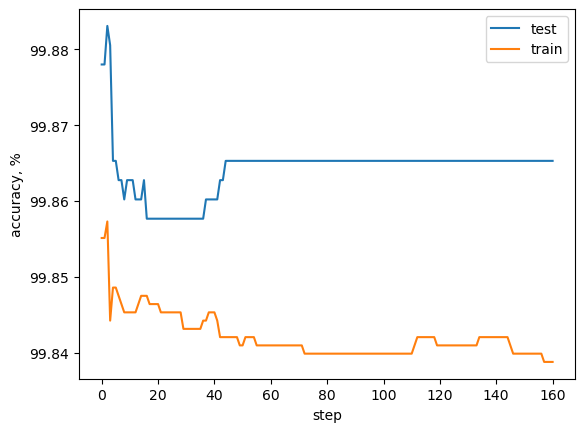

In [28]:
step_ar = np.arange(0,steps+1,1)
accuracy_test = my_accuracy_score([y_test]*(steps+1), sigmoid(history@X_test_inter.T).round(0))
accuracy_train = my_accuracy_score([y_train]*(steps+1), sigmoid(history@X_train_inter.T).round(0))
plt.plot(step_ar, accuracy_test*100, label = 'test')
plt.plot(step_ar, accuracy_train*100, label = 'train')
plt.ylabel('accuracy, %')
plt.xlabel('step');
plt.legend();

Видно, что ошибка после 40 на test буквально константа, потому что коэфициенты находятся вблизи оптимальных. а округление сигмы нивилирует малое изменение $\theta$.

Тем не менее ошибка на train растёт, опять же из-за дисбаланса классов. Вдобавок в стохастичекий подъемы скорее попадают 0-объекты, что ещё сильнее ухудшает ситуацию

Посчитайте ошибку на тестовой выборке.

In [29]:
predicted = sigmoid(theta@X_test_inter.T).round(0)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
print(f'Accuracy = {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')
print(f'F1 = {f1:.5f}')

Accuracy = 0.99865
Precision: 0.35294
Recall: 0.12500
F1 = 0.18462


In [30]:
y_test[y_test == 0].shape

(39295,)

In [37]:
y_test[y_test == 0].shape[0]/y_test.shape[0]

0.9987799608570775

In [31]:
np.array([predicted == y_test]).sum()

39290

Сделайте выводы.

Как я уже писал сдесь и в чате, метрика accuracy не информативна в данном случае. 

По графику видно, что accuracy на тесте всегда выше, чем на train, чего быть не должно из здравого смысла.

Как видно из последних 2х строчек кода, ошибка accuracy была бы меньше, если бы модель всегда возращала "0", потому что у нас сильный дисбаланс классов.